# installed important libraries

In [3]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#plot style
sns.set_theme(style="white", palette="pastel")
plt.rcParams["figure.figsize"] = (10, 6)
%matplotlib inline



# Add src to the Python path so you can import modules from it
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))  
src_path = os.path.join(project_root, 'src')
if src_path not in sys.path:
    sys.path.append(src_path)

#  Import your custom functions from src/data/process_events.py
from data.process_events import read_brent_prices, inspect_dataset, preprocess_brent_data


In [4]:
# Load the data
# Define the file path
file_path = 'C:/Users/HP/10 Acadamy PRojects/New folder (10)/Event-Driven_Insights_on_B_Oil_Price_Shocks/data/raw/BrentOilPrices.csv'

# Load the data
with open(file_path, 'r', encoding='utf-8') as f:
    data = pd.read_csv(f)

# Statistical analysis

In [5]:
# Display the first few rows
print(data.head(10))

        Date  Price
0  20-May-87  18.63
1  21-May-87  18.45
2  22-May-87  18.55
3  25-May-87  18.60
4  26-May-87  18.63
5  27-May-87  18.60
6  28-May-87  18.60
7  29-May-87  18.58
8  01-Jun-87  18.65
9  02-Jun-87  18.68


In [6]:
print("\nDataset Shape:", data.shape)
print("\nMissing Values:")
print(data.isnull().sum())
print("\nUnique Products:")
data.describe()


Dataset Shape: (9011, 2)

Missing Values:
Date     0
Price    0
dtype: int64

Unique Products:


,Price
count,9011.000000
mean,48.420782
std,32.860110
min,9.100000
25%,19.050000
50%,38.570000
75%,70.090000
max,143.950000


In [7]:
data.describe()

,Price
count,9011.000000
mean,48.420782
std,32.860110
min,9.100000
25%,19.050000
50%,38.570000
75%,70.090000
max,143.950000


### Distribution Plot

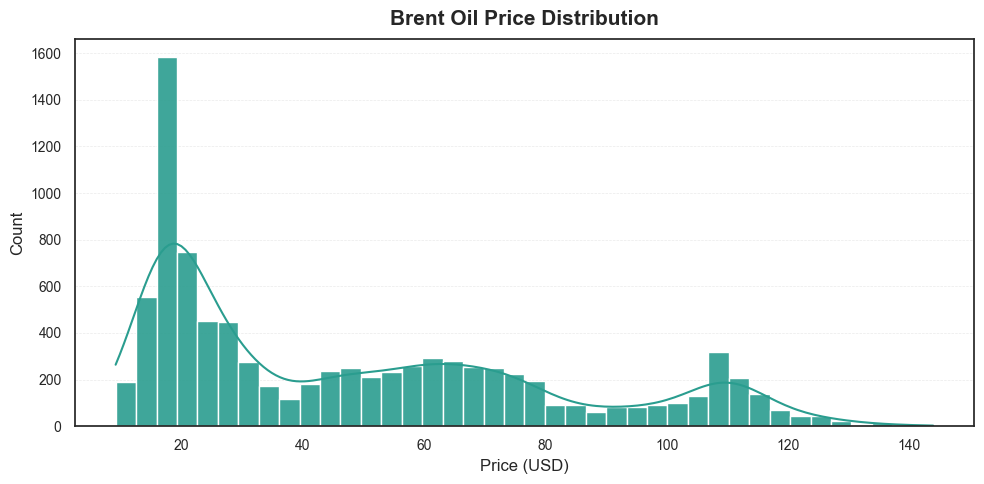

In [8]:
plt.figure(figsize=(10, 5))
sns.histplot(
    data['Price'], bins=40, kde=True,
    color='#2a9d8f', edgecolor='white', alpha=0.9
)
plt.title('Brent Oil Price Distribution', fontsize=15, weight='bold', pad=10)
plt.xlabel('Price (USD)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.4)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


### Moving Avg

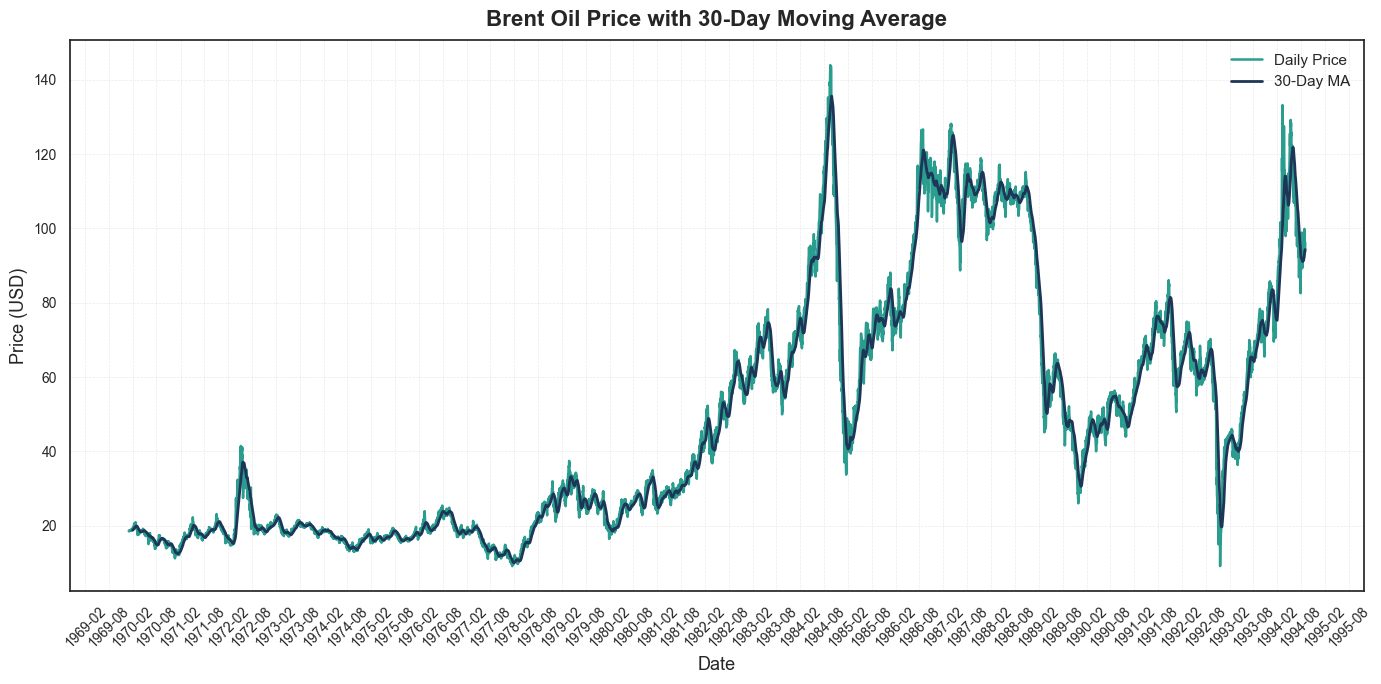

In [9]:
import matplotlib.dates as mdates

data['Price_MA30'] = data['Price'].rolling(30).mean()

plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Price'], label='Daily Price', c='#2a9d8f', lw=1.8)
plt.plot(data['Date'], data['Price_MA30'], label='30-Day MA', c='#1d3557', lw=2)


plt.title('Brent Oil Price with 30-Day Moving Average', fontsize=16, weight='bold', pad=10)
plt.xlabel('Date', fontsize=13)
plt.ylabel('Price (USD)', fontsize=13)

# Rotate and format date ticks
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(ls='--', lw=0.5, alpha=0.4)
plt.legend(frameon=False)
plt.tight_layout()
plt.show()


### Time Series Plot

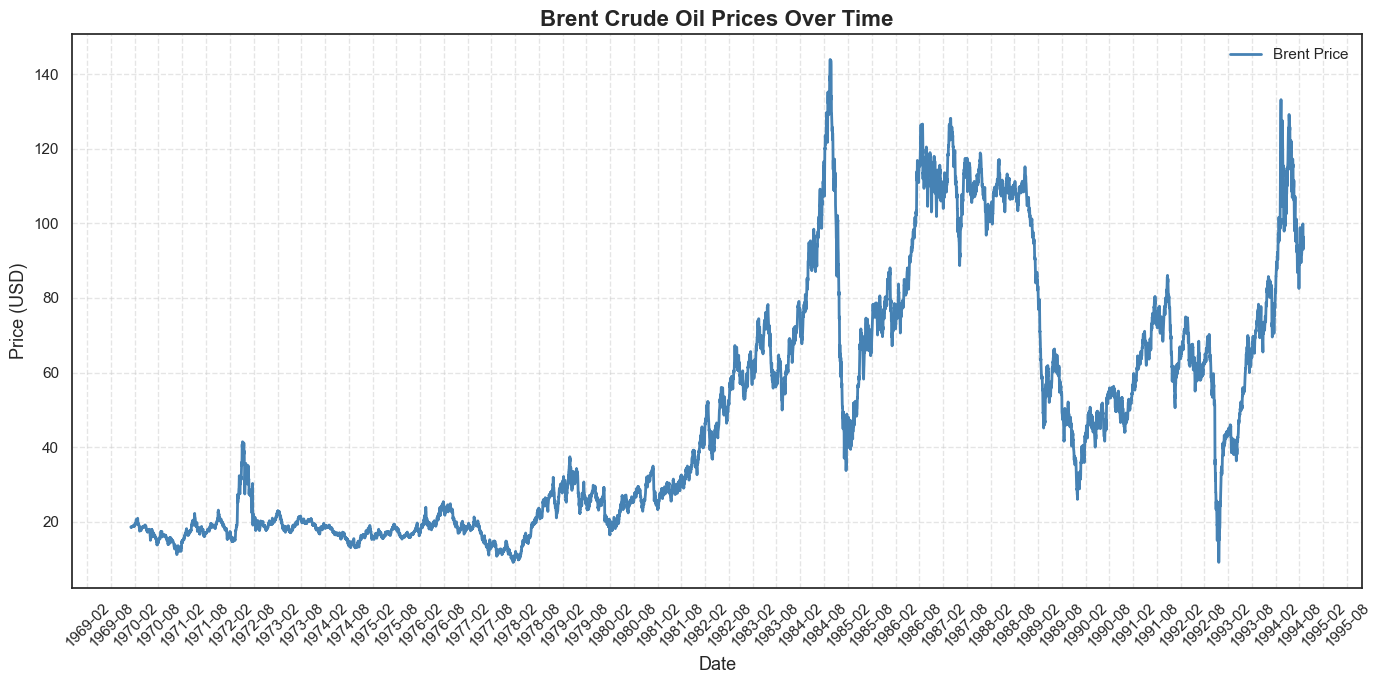

In [10]:
import matplotlib.dates as mdates

plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Price'], color='steelblue', lw=2, label='Brent Price')
plt.title('Brent Crude Oil Prices Over Time', fontsize=16, weight='bold')
plt.xlabel('Date', fontsize=13)
plt.ylabel('Price (USD)', fontsize=13)

# Rotate and format date ticks
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))  # major ticks every 6 months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xticks(rotation=45)
plt.grid(True, ls='--', alpha=0.5)
plt.legend(frameon=False)
plt.tight_layout()
plt.show()


# Explore Detailed Patterns and Seasonal Trends

In [11]:
!pip install statsmodels



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
import numpy as np

# Perform decomposition
decomp = seasonal_decompose(data['Price'], model='additive', period=365)

# Extract components
components = {
    'Original': data['Price'],
    'Trend': decomp.trend,
    'Seasonal': decomp.seasonal,
    'Residual': decomp.resid
}

# Function to print summary stats for a series
def print_stats(name, series):
    series_clean = series.dropna()
    print(f"📊 {name} Component Summary:")
    print(f"- Mean: {series_clean.mean():.2f}")
    print(f"- Median: {series_clean.median():.2f}")
    print(f"- Std Dev: {series_clean.std():.2f}")
    print(f"- Min: {series_clean.min():.2f}")
    print(f"- Max: {series_clean.max():.2f}")
    print("-" * 30)

# Print stats for each component
for name, series in components.items():
    print_stats(name, series)


📊 Original Component Summary:
- Mean: 48.42
- Median: 38.57
- Std Dev: 32.86
- Min: 9.10
- Max: 143.95
------------------------------
📊 Trend Component Summary:
- Mean: 48.00
- Median: 44.58
- Std Dev: 30.69
- Min: 12.87
- Max: 112.71
------------------------------
📊 Seasonal Component Summary:
- Mean: -0.01
- Median: 0.28
- Std Dev: 2.55
- Min: -4.84
- Max: 4.37
------------------------------
📊 Residual Component Summary:
- Mean: -0.16
- Median: -0.29
- Std Dev: 7.35
- Min: -38.67
- Max: 52.40
------------------------------


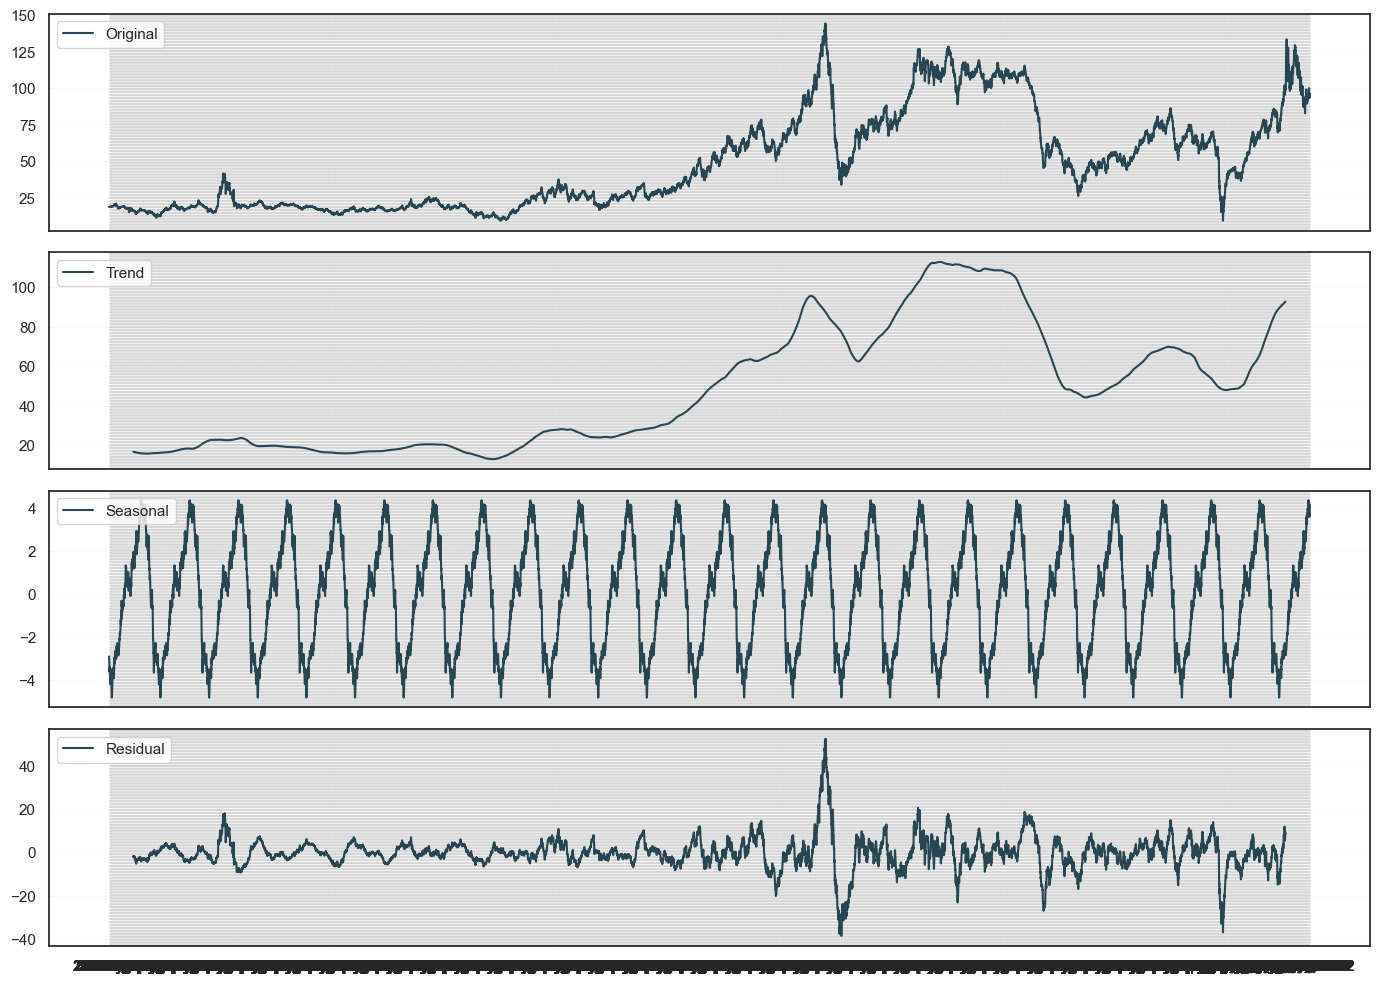

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform decomposition
decomp = seasonal_decompose(data['Price'], model='additive', period=365)

# Plot components
fig, axes = plt.subplots(4, 1, figsize=(14, 10), sharex=True)
components = {
    'Original': data['Price'],
    'Trend': decomp.trend,
    'Seasonal': decomp.seasonal,
    'Residual': decomp.resid
}

for ax, (title, series) in zip(axes, components.items()):
    ax.plot(data['Date'], series, label=title, color='#264653')
    ax.legend(loc='upper left')
    ax.grid(ls='--', lw=0.4, alpha=0.3)

plt.tight_layout()
plt.show()


# Seasonal Pattern Detection

In [21]:
# Clean seasonal component (remove NaN)
seasonal = decomp.seasonal.dropna()

print("📊 Seasonal Component Summary:")
print(f"- Mean: {seasonal.mean():.4f}")
print(f"- Median: {seasonal.median():.4f}")
print(f"- Std Dev: {seasonal.std():.4f}")
print(f"- Min: {seasonal.min():.4f}")
print(f"- Max: {seasonal.max():.4f}")


📊 Seasonal Component Summary:
- Mean: -0.0055
- Median: 0.2833
- Std Dev: 2.5546
- Min: -4.8429
- Max: 4.3662


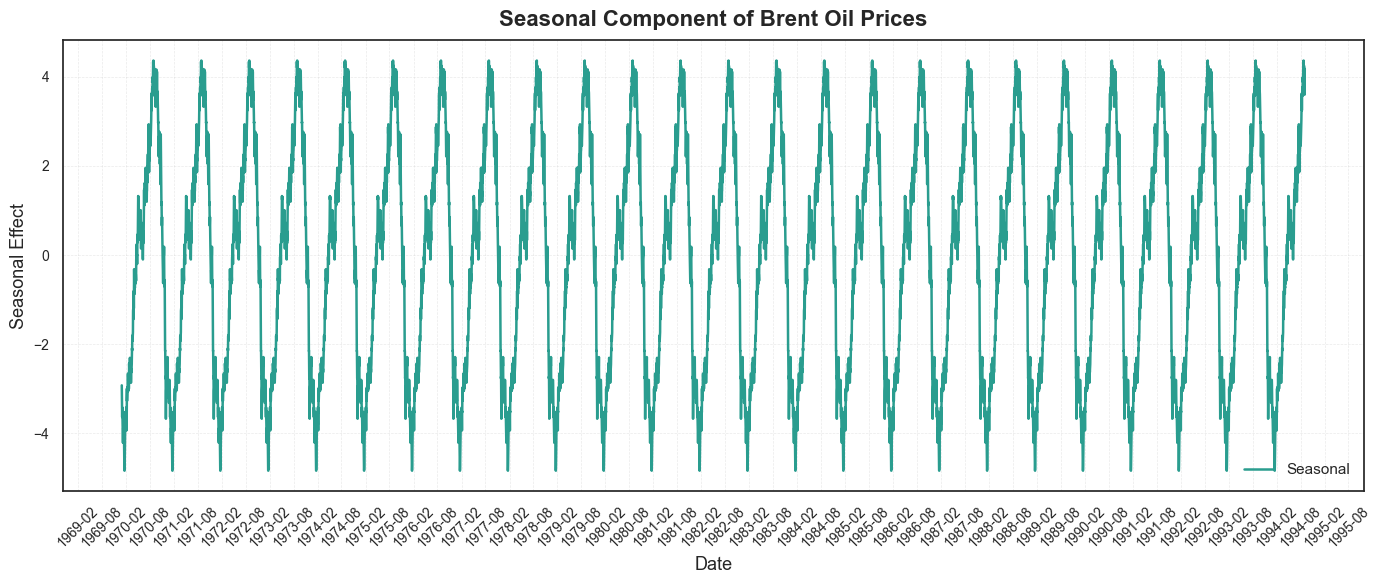

In [15]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(14, 6))
plt.plot(data['Date'], decomp.seasonal, c='#2a9d8f', lw=1.8, label='Seasonal')

plt.title('Seasonal Component of Brent Oil Prices', fontsize=16, weight='bold', pad=10)
plt.xlabel('Date', fontsize=13)
plt.ylabel('Seasonal Effect', fontsize=13)
plt.grid(ls='--', lw=0.5, alpha=0.4)

# Format x-axis ticks
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Set x-axis interval to 6 months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.legend(frameon=False)
plt.tight_layout()
plt.show()


## Interdependence Analysis

In [24]:

price = data['Price'].dropna()

# Calculate autocorrelations for lags 1 to 30 (you can adjust the max lag)
max_lag = 30
autocorr_values = [price.autocorr(lag=lag) for lag in range(1, max_lag + 1)]

print("📊 Autocorrelation values for Brent Oil Prices:")
for lag, val in enumerate(autocorr_values, start=1):
    print(f"- Lag {lag}: {val:.4f}")


📊 Autocorrelation values for Brent Oil Prices:
- Lag 1: 0.9993
- Lag 2: 0.9986
- Lag 3: 0.9979
- Lag 4: 0.9972
- Lag 5: 0.9965
- Lag 6: 0.9958
- Lag 7: 0.9952
- Lag 8: 0.9945
- Lag 9: 0.9939
- Lag 10: 0.9932
- Lag 11: 0.9925
- Lag 12: 0.9918
- Lag 13: 0.9911
- Lag 14: 0.9903
- Lag 15: 0.9895
- Lag 16: 0.9887
- Lag 17: 0.9878
- Lag 18: 0.9869
- Lag 19: 0.9861
- Lag 20: 0.9853
- Lag 21: 0.9844
- Lag 22: 0.9835
- Lag 23: 0.9827
- Lag 24: 0.9818
- Lag 25: 0.9809
- Lag 26: 0.9801
- Lag 27: 0.9792
- Lag 28: 0.9783
- Lag 29: 0.9774
- Lag 30: 0.9764


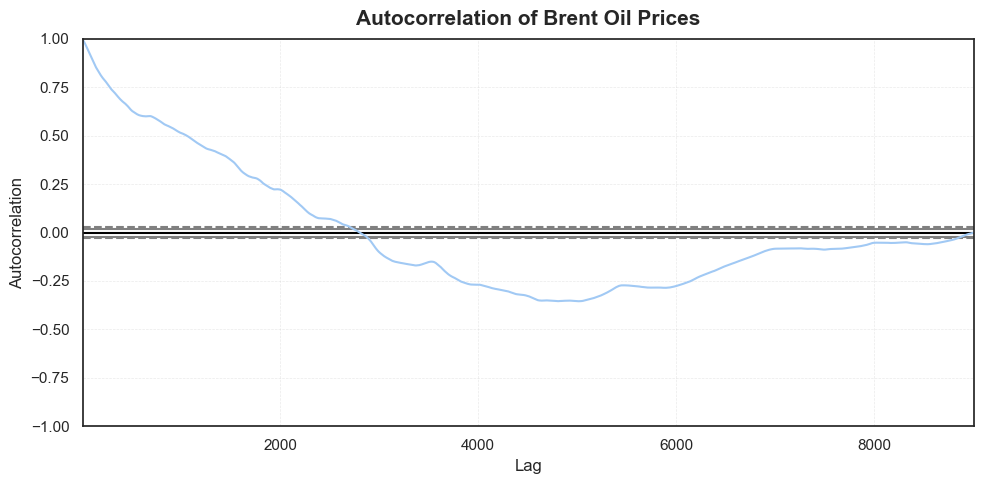

In [22]:
from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(10, 5))
autocorrelation_plot(data['Price'])
plt.title('Autocorrelation of Brent Oil Prices', fontsize=15, weight='bold', pad=10)
plt.grid(ls='--', lw=0.5, alpha=0.4)
plt.tight_layout()
plt.show()


### Feature Engineering: Generating New Variables for Prediction 

